# Accessing Text Corpora

**Corpora**: large bodies of linguistic data, usually text
- usually contains material focused in one genre
- for example, the book material we downloaded included things from fiction or the US Presidential addresses
- this lesson will cover how to access and use other corpora

# 1.1   Gutenberg Corpus
- http://www.gutenberg.org/
- What is Project Gutenberg?
- A free book website with over 50,000 books that are out of copyright

You can view the available corpora at: http://www.nltk.org/nltk_data/

To view a corpus, use:
nltk.corpus.*corpusid*.*other function*

Here's some examples of the other functions:
- words(): list of str
- sents(): list of (list of str)
- paras(): list of (list of (list of str))
- tagged_words(): list of (str,str) tuple
- tagged_sents(): list of (list of (str,str))
- tagged_paras(): list of (list of (list of (str,str)))
- chunked_sents(): list of (Tree w/ (str,str) leaves)
- parsed_sents(): list of (Tree with str leaves)
- parsed_paras(): list of (list of (Tree with str leaves))
- xml(): A single xml ElementTree
- raw(): unprocessed corpus contents
- fileids(): list of files in the corpus

In [1]:
import matplotlib.pyplot as plt
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Next, we can save a specific text to use later: 

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print(len(emma))
type(emma)
emma

192427


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In the first lesson, we learned about functions like concordance, which you would think we could do with *text*.concordance() 
- However, when we use the .words() function, we are creating a list object. 
- Therefore, we need to convert it to a `nltk.Text` object to use the functions we did before. 

In [53]:
emma = nltk.Text(emma)
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

Here's another way we can do the same thing:

In [4]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())
emma = gutenberg.words('austen-emma.txt')
emma = nltk.Text(emma)
emma.concordance("surprize")

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreov

There are many files in the Gutenberg corpus - how might we look at each one's statistics without cutting and pasting a lot of code?

Remember `for` loops - you could loop over the `fileid` and see information about each text one at a time. 

In [5]:
#help(gutenberg.sents)
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) #unprocessed text
    num_words = len(gutenberg.words(fileid)) #processed into words
    num_sents = len(gutenberg.sents(fileid)) #processed into sentences
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) #types (unique words)
    print(round(num_chars/num_words), 
          round(num_words/num_sents), 
          num_vocab/num_words, fileid)

5 25 0.03816512235808904 austen-emma.txt
5 26 0.059437104643937616 austen-persuasion.txt
5 28 0.04522659207775329 austen-sense.txt
4 34 0.012632414258490047 bible-kjv.txt
5 19 0.18374431410102945 blake-poems.txt
4 19 0.0709104979932689 bryant-stories.txt
4 18 0.08221273005326162 burgess-busterbrown.txt
4 20 0.0772793902081501 carroll-alice.txt
5 20 0.08593137861355107 chesterton-ball.txt
5 23 0.0905615653649071 chesterton-brown.txt
5 18 0.09173132215046306 chesterton-thursday.txt
4 21 0.0400972168819394 edgeworth-parents.txt
5 26 0.06606497226045649 melville-moby_dick.txt
5 52 0.09316808675445391 milton-paradise.txt
4 12 0.11736925637750165 shakespeare-caesar.txt
4 12 0.12623126338329765 shakespeare-hamlet.txt
4 12 0.14969749351771824 shakespeare-macbeth.txt
5 36 0.08039617001220276 whitman-leaves.txt


What other information might we find in a corpus?
- Part of speech tags
- Dialog tags
- Syntax trees

# 1.2 Web Chat and Text
Project Gutenberg is a good collection of literature - but we might be interested in corpora that include more natural or spoken-esque speech. 

In [6]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid)
help(webtext)

firefox.txt
grail.txt
overheard.txt
pirates.txt
singles.txt
wine.txt
Help on PlaintextCorpusReader in module nltk.corpus.reader.plaintext object:

class PlaintextCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  PlaintextCorpusReader(root, fileids, word_tokenizer=WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>), sent_tokenizer=<nltk.tokenize.punkt.PunktSentenceTokenizer object at 0x1a1b7b7208>, para_block_reader=<function read_blankline_block at 0x1a1b7c5598>, encoding='utf8')
 |  
 |  Reader for corpora that consist of plaintext documents.  Paragraphs
 |  are assumed to be split using blank lines.  Sentences and words can
 |  be tokenized using the default tokenizers, or by custom tokenizers
 |  specificed as parameters to the constructor.
 |  
 |  This corpus reader can be customized (e.g., to skip preface
 |  sections of specific document formats) by creating a subclass and
 |  overriding the ``CorpusVi

Another source of more naturalistic speech might be Internet chat sessions.

In [7]:
from nltk.corpus import nps_chat
for fileid in nps_chat.fileids():
    print(fileid)

10-19-20s_706posts.xml
10-19-30s_705posts.xml
10-19-40s_686posts.xml
10-19-adults_706posts.xml
10-24-40s_706posts.xml
10-26-teens_706posts.xml
11-06-adults_706posts.xml
11-08-20s_705posts.xml
11-08-40s_706posts.xml
11-08-adults_705posts.xml
11-08-teens_706posts.xml
11-09-20s_706posts.xml
11-09-40s_706posts.xml
11-09-adults_706posts.xml
11-09-teens_706posts.xml


In [8]:
chatroom = nps_chat.posts('10-19-adults_706posts.xml') #notice this is .posts
chatroom[5:10]

[['lol', 'U16', 'hiYas'],
 ['everything', '?'],
 ['.', 'ACTION', 'licks', 'U32', '.'],
 ['what',
  'kinda',
  'of',
  'sucker',
  'bloe',
  'pop',
  'or',
  'a',
  'dum',
  'dum',
  '????'],
 ['PART']]

# 1.3 The Brown Corpus

- (Everyone's favorite overused corpus) 
- You can read more about it here: http://clu.uni.no/icame/manuals/BROWN/INDEX.HTM
- We've seen how to pull out `raw`, `words`, `sents` - but we can also pull out a list of `categories`. 

In [9]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [10]:
print(brown.words(categories='news'))
print()
print(brown.sents(categories='news'))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


**Stylistics**: understanding systematic differences between genres - basically, figuring out how writing might be different for each type of writing. 

Example: compare each genre in their usage of "modal" verbs 
- Which are verbs that express likelihood or ability 
- Things like will, shall, could, might 

Here's one way we can pull the information on modal verbs (or any set of words really):

In [11]:
#import the corpus
from nltk.corpus import brown 
#save all the news words
news_text = brown.words(categories='news') 
#create the freqdist object, but first, lower case all the text
#the for loop here is necessary to process into lower case
#you could separate this into a different line like 
#news_text = [w.lower() for w in news_text]
fdist = nltk.FreqDist(w.lower() for w in news_text) 

In [56]:
#define the list of words you are interested in
modals = ['can', 'could', 'may', 'might', 'must', 'will']
#print out their frequency
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

We could repeat this process until we have all the genres counted up to compare them against each other. 
- However, there's always a more concise way.
- That doesn't mean that the brute force way with lots of code lines is bad.
- Good code is code that runs and does what you want it to do.

# 2 Conditional Frequency Distributions

**Conditional Frequency Distribution**: a set of frequency distributions separated by a specific grouping variable. Therefore, you will get a word count (or other basic statistic) based on the grouping variable. You can think about this like you would calculating the mean for each group in a simple statistics study.

# 2.1   Conditions and Events

When we are calculating a conditional frequency distribution, we are separating by:
-	Condition: the group or separating variable
-	Event: the thing we are looking for, such as word count in a text. 
-	Then, we pair them together - in a news text, you might see the words war (news-war), then in a romance text, you might see the word love (romance-love). 
-	End up with a list object, which is structured in pairs. 

# 2.2   Counting Words by Genre

The ConditionalFreqDist function: takes a list of pairs + loops to create frequency distributions separated by those pairs. 
- You can think of this function as separate by *this* and *that* 
- And then create a frequency distribution on the separated groups

In [57]:
cfd = nltk.ConditionalFreqDist(
    (genre, word) #separate on genre and word, these are made up var names
    for genre in brown.categories() #loop over categories (which we called genre)
    for word in brown.words(categories=genre)) #loop over words
#notice how the loop builds in the last line
print(cfd)

<ConditionalFreqDist with 15 conditions>


# 2.3   Plotting and Tabulating Distributions

Both .plot and .tabulate can work on a ConditionalFreqDist() object, and have a few arguments:
-	conditions = *variable name or list* 
-	samples = *variable name or list*
-	If you omit those arguments you get all of the combinations
-	Usually you might consider calculating the entire frequency distribution, then plot or tabulate only a section of it (unless memory issues prohibit).

Let's now create some output from those conditional frequency distributions. 

The tabulate function: takes two parameters:
- conditions: which groups you want to pull information from (the genres here)
- samples: which words from the frequency distribution you want to pull

In [14]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Some other functions related to CFD:

- cfdist = ConditionalFreqDist(pairs)	create a conditional frequency distribution from a list of pairs
- cfdist.conditions()	the conditions
- cfdist[condition]	the frequency distribution for this condition
- cfdist[condition][sample]	frequency for the given sample for this condition
- cfdist.tabulate()	tabulate the conditional frequency distribution
- cfdist.tabulate(samples, conditions)	tabulation limited to the specified samples and conditions
- cfdist.plot()	graphical plot of the conditional frequency distribution
- cfdist.plot(samples, conditions)	graphical plot limited to the specified samples and conditions

# 1.4 Reuters Corpus

- Contains 10,000+ news documents with over 1.3 million words. 
- A good corpus for training and testing models (for classification and topic discovery, discussed later)
- While the Brown Corpus is separated into distinct categories, these documents are tagged with multiple categories, as news sources are often a more than one 

In [15]:
from nltk.corpus import reuters
print(reuters.fileids()[:10])
print(reuters.categories()[:10])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843']
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee']


Therefore, you can pass one object or a list to the functions here.   	

In [16]:
print(reuters.categories('training/9865')) #categories for this fileid
print(reuters.categories(['training/9865', 'training/9880'])) #categories for multiple fileids
print(reuters.fileids('barley')[:10]) #fileids with this category
print(reuters.fileids(['barley', 'corn'])[:10]) #fileids with multiple categories

['barley', 'corn', 'grain', 'wheat']
['barley', 'corn', 'grain', 'money-fx', 'wheat']
['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024']
['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15649']


- You find words by either `fileid` or `category`.
- The first words are in upper case, denoting that they are the title of the article.

In [17]:
print(reuters.words(['training/9865', 'training/9880']))
print(reuters.words(categories='coffee'))

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]
['INDONESIAN', 'COMMODITY', 'EXCHANGE', 'MAY', ...]


# 1.5 Inaugural Address Corpus

- The Inaugural Address Corpus is something we used in Lesson 1 but now we can keep each address separate and look at trends across time.
- To get the time, we can use slicing and `for` loops.

In [18]:
from nltk.corpus import inaugural
print(inaugural.fileids())
[fileid[:4] for fileid in inaugural.fileids()][:5]

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

['1789', '1793', '1797', '1801', '1805']

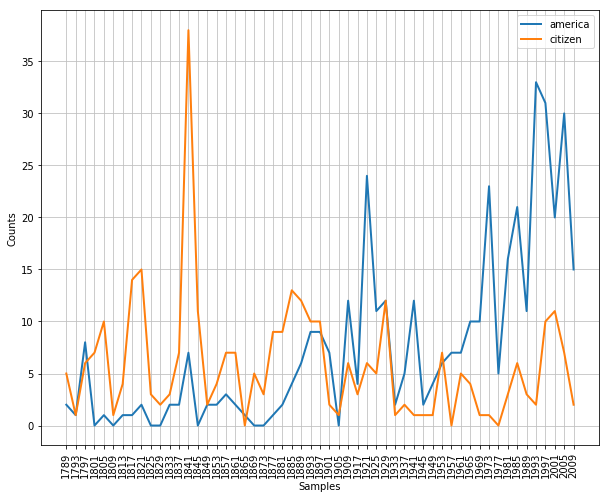

In [19]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4]) #takes two items
           for fileid in inaugural.fileids() #loop over fileids
           for w in inaugural.words(fileid) #loop over words
           for target in ['america', 'citizen'] #loop over times for these words
           if w.lower().startswith(target)) #lower case and find when it starts
plt.figure(figsize=(10, 8)) #note these sizes are "inches" so don't put something like 100
cfd.plot() #plot it


# 1.6   Annotated Text Corpora

- Many of these corpora include other important pieces of information, such as part of speech, semantic roles, and syntax. 
- Check out the table at http://www.nltk.org/book/ch02.html#tab-corpora.

# 1.7   Corpora in Other Languages

-	Don’t want English? After all, it’s not the most spoken language in the world!
-	We will have to learn how to process specific types of characters in a later chapter to work with these effectively though.

In [20]:
#nltk.corpus.cess_esp.words()
#nltk.corpus.floresta.words()
#nltk.corpus.indian.words('hindi.pos')

-	The UDHR is the Universal Declaration of Human Rights in 300 languages! 
-	Having multiple languages on the same text allows us to understand how they relate to each other.  
-	A simple example would be to look at word lengths. 

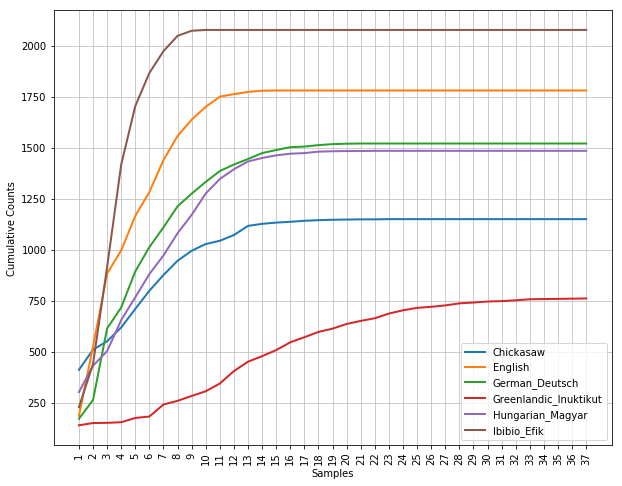

In [21]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
     'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))
plt.figure(figsize=(10, 8))
cfd.plot(cumulative=True)

# 1.8   Text Corpus Structure
-	Texts can be structured in several ways
-	None - just lot of words
-	Categorized – by genre, author, language
-	Overlapping – often by topic, when things are not one or the other
-	Temporal – things like News that are grouped by time

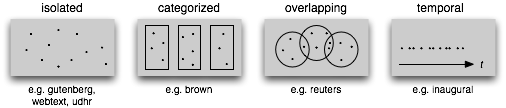

In [22]:
from IPython.display import Image
Image("lesson2-text-corpus-structure.png")

Functions we can use include:
- `fileids()`	the files of the corpus
- `categories()`	the categories of the corpus
- `raw()`	the raw content of the corpus
- `words()`	the words of the whole corpus
- `sents()`	the sentences of the whole corpus
- `abspath(fileid)`	the location of the given file on disk
- `encoding(fileid)`	the encoding of the file (if known)
- `open(fileid)`	open a stream for reading the given corpus file
- `root`	if the path to the root of locally installed corpus
- `readme()`	the contents of the README file of the corpus

- Check out the Language Goldmine or the LAB to find your own corpus you might be interested in using for the final project. 
- You can use section 1.9 to learn how to load your own downloaded corpus. 
- http://languagegoldmine.com/
- http://wordnorms.com

# 4   Lexical Resources

**Lexicon**: mental dictionary
-	Thought to contain the definition of a word
-	Along with part of speech
-	Sense disambiguation
-	Morphemes
-	Phonological information 
-	Orthographic information

**Lexical entry**: includes headword/lemma, sense definition, part of speech

**Headword/lemma**: word you might find in a dictionary


**Lexeme**: Set of all forms of a word that have the same meaning
-	Run is a lemma
-	Runs, ran, running are lexemes

**Homonyms**: words that are spelled the same 
-	Homo: same
-	Nym: spelling

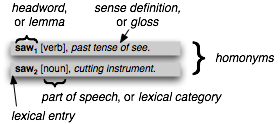

In [23]:
Image("lesson2-lexicon.png")

# 4.1   Wordlist Corpora

NLTK provides a corpus Words that can allow us to spell check or find unusual words in another set of text. We might define our own spell checking function:

In [24]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)
print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:10])
print(unusual_words(nltk.corpus.nps_chat.words())[:10])

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations']
['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams']


**Stopwords**: high-frequency words that we often want to exclude in our analyses like the, to, an, a

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We might consider figuring out just how much of a text is stop words:

In [26]:
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

Cheat at Scrabble games!

Given a set of letters, we can figure out what words can be created from those letters:

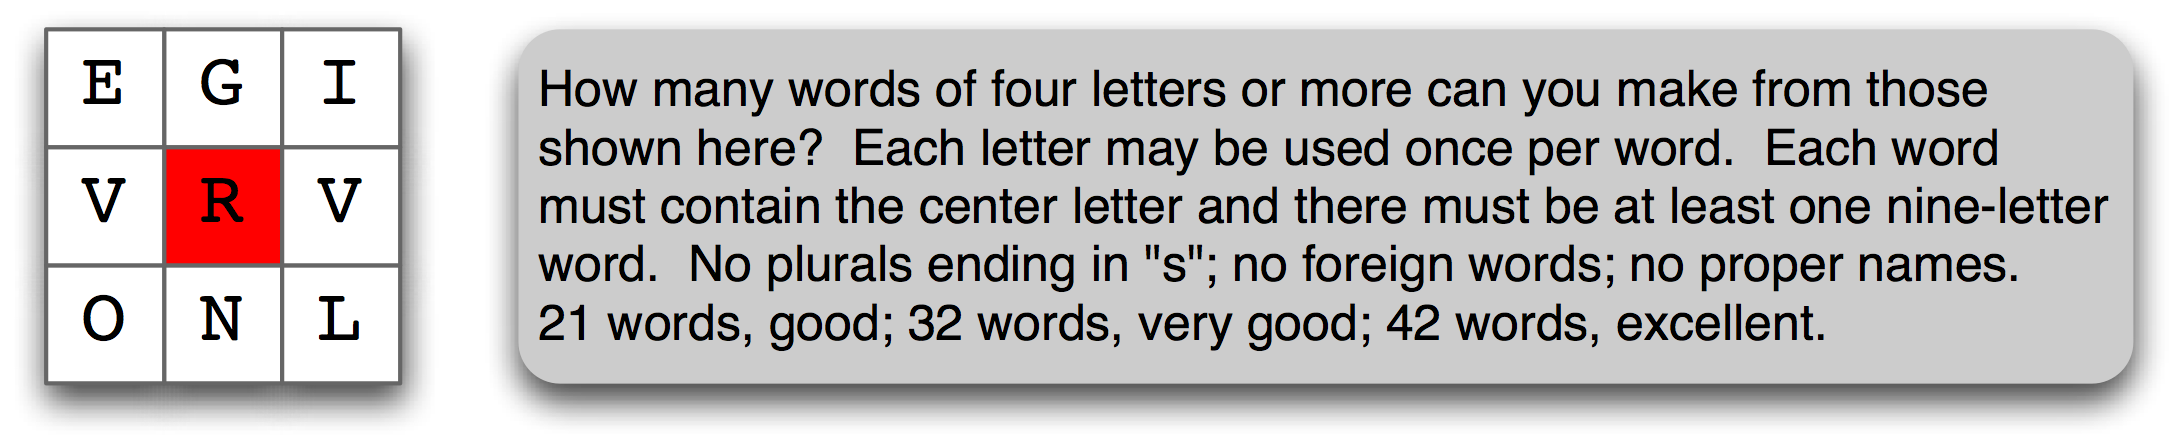

In [27]:
Image("lesson2-target.png")

In [64]:
puzzle_letters = nltk.FreqDist('egivrvonl')
for (cheese) in puzzle_letters:
    print(cheese, " ", puzzle_letters[cheese])

obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 
                      and obligatory in w 
                      and nltk.FreqDist(w) <= puzzle_letters] 

e   1
g   1
i   1
v   2
r   1
o   1
n   1
l   1


['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

What names are gender ambiguous?

In [65]:
names = nltk.corpus.names
print(names.fileids())
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['female.txt', 'male.txt']


['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

# 4.2   A Pronouncing Dictionary

Now, let’s look at a corpus with more than just word information. The `cmudict` corpus includes the word plus codes for English phone pronunciation, which is used in reading speech aloud. 

In [30]:
entries = nltk.corpus.cmudict.entries()
print(len(entries))
for entry in entries[42371:42379]:
     print(entry)

133737
('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


Given that each one has two pieces of information, we need to update the `for` loop to handle that information:

In [31]:
for word, pron in entries: 
     if len(pron) == 3: 
         ph1, ph2, ph3 = pron 
         if ph1 == 'P' and ph3 == 'T':
             print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

We might also want to find rhyming words.

This example also demonstrates the **Many to Many Problem**. 

In [32]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

Another option we might consider is using **dictionary data structure** in Python, rather than just lists or loops over lists. 

- Dictionaries include key (the look up word/name) and entry. 
- If the key does not exist, you will get a `KeyError`. 
- But you can add information to dictionaries in the same way that you try to open them:

In [33]:
prondict = nltk.corpus.cmudict.dict()
print(prondict['fire'])
#prondict['blog'] 
prondict['blog'] = [['B', 'L', 'AA1', 'G']] 
prondict['blog']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]


[['B', 'L', 'AA1', 'G']]

# 4.3   Comparative Wordlists

-	What about translation? We can use `swadesh` to look at common words across languages. 
-	The languages are identified using an ISO 639 two-letter code.

The entries() function: allows you to send the corresponding entries in a corpus.

*corpus*.entries([*“list”, “list”*]) 


In [34]:
from nltk.corpus import swadesh
print(swadesh.fileids())
fr2en = swadesh.entries(['fr', 'en'])
print(fr2en)

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']
[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick'), ('lourd', 'heavy'), ('petit', 'small'), ('court', 'short'), ('étroit', 'narrow'), ('mince', 'thin'), ('femme', 'woman'), ('homme', 'man (adult male)'), ('homme', 'man (human being)'), ('enfant', 'child'), ('femme, épouse', 'wife'), ('mari, époux', 'husband'), ('mère', 'mother'),

We can create our own dictionaries using the `dict` function (which takes a list of key-entry pairs).

You can then update the dictionary by adding other values using the update function (adds to a dictionary or list).

In [35]:
translate = dict(fr2en)
print(translate['chien'])
print(translate['jeter'])
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['perro']

dog
throw


'dog'

# 4.4   Shoebox and Toolbox Lexicons
- Toolbox is a linguistic data manager available at http://www.sil.org/computing/toolbox/.
- Files contain entries with lots of fields and mappings. 
    - For example, here we see ('ps', 'V') to indicate that the part-of-speech is 'V' (verb), as well as ('ge', 'gag') to indicate that the gloss-into-English is 'gag'.
    - We might consider using XML to help process this type of data (covered later).


In [36]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

# 5   WordNet

-	WORDNET IS THE SHIZ!
-	Semantically focused dictionary with a hierarchical structure. 

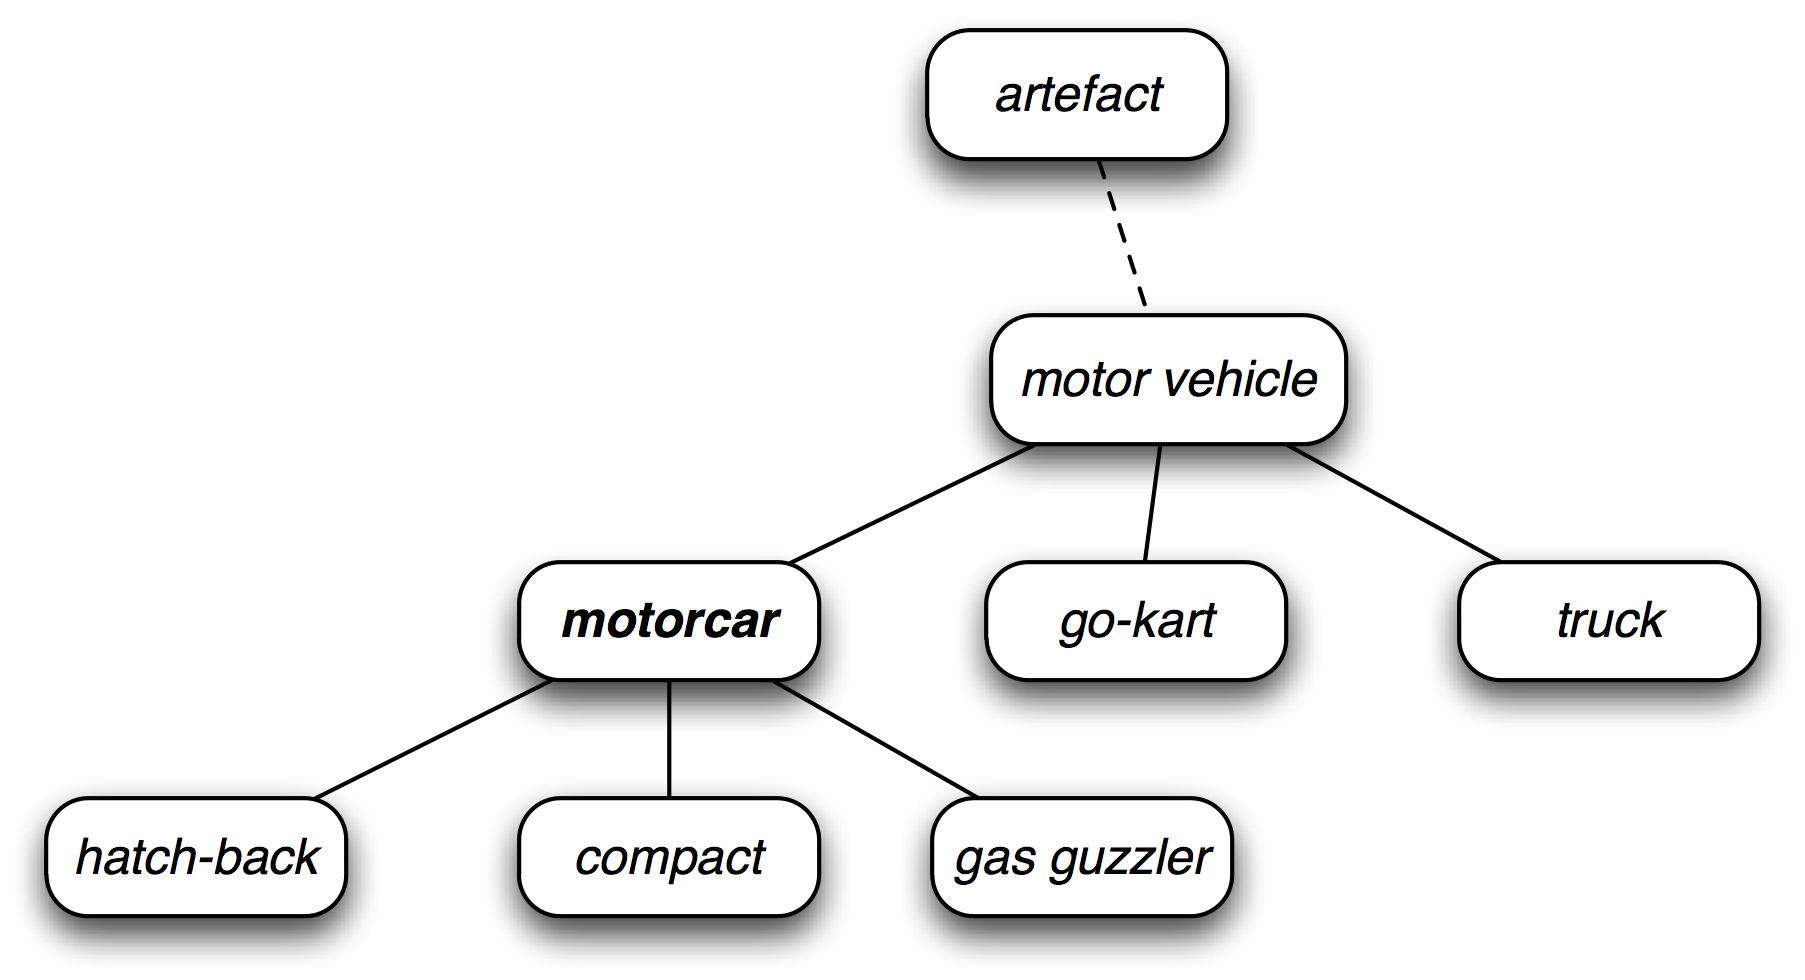

In [37]:
Image("lesson2-wordnet-hierarchy.png")

# 5.1   Senses and Synonyms

**Synonyms**: words with the same or similar meaning. 
-	Benz is credited with the invention of the motorcar.
-	Benz is credited with the invention of the automobile.
- Replacing motorcar with automobile keeps the same meaning of the sentence, so they are related. We can view them using the synsets function in WordNet. 


In [38]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

We see that motorcar has one related word, which is `car.n.01`:
-	Word
-	Part of Speech
-	Definition number 

We can view the words related to `car.n.01` and just get the names by using the `lemma_names` function, which pulls the name of the listings (lemmas) instead of the complete listing with lemma.pos.definition number.


In [39]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

- You can figure out what the definition of a word is by using the `definition` function, which is related the .01 at the end of the marker. 
- Another function is `examples`, which gives the word in an example sentence. 

In [40]:
print(wn.synset('car.n.01').definition())
print(wn.synset('car.n.01').examples())

a motor vehicle with four wheels; usually propelled by an internal combustion engine
['he needs a car to get to work']


Lots of words have multiple synsets (part of the problem with English and ambiguity we’ve talked about): 

In [41]:
print(wn.synsets('car'))
for synset in wn.synsets('car'):
     print(synset.lemma_names())

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


# 5.2   The WordNet Hierarchy

Because WordNet has a hierarchy, that means we can move between related words through the hierarchy. The hyponyms function lets you look at the words below a chosen one in a category. 
-	Basic level category - most general name for something - the level that you are working at "car"
-	Superordinate - the more abstract level naming for the words above it in a structure (hypernym) "vehicle"
- Subordinate - the more concrete level naming for words lower in the structure (hyponym) "Honda"


In [42]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print(types_of_motorcar[0])
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

Synset('ambulance.n.01')


['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

Moving up in the structure, we might find more than one path:

For example, there are two paths between `car.n.01` and `entity.n.01` because `wheeled_vehicle.n.01` can be classified as both a vehicle and a container.

In [43]:
print(motorcar.hypernyms())
paths = motorcar.hypernym_paths()
print(len(paths))
print([synset.name() for synset in paths[0]])
print([synset.name() for synset in paths[1]])

[Synset('motor_vehicle.n.01')]
2
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']


To get the most generalized hypernym:

In [44]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

# 5.3   More Lexical Relations

-	Hyper/hyponyms are what is called “isa” relations, and we can move up and down the hierarchy between them. 
-	**Meronyms**: features of items using the part_meronyms and substance_meronyms functions. 
    - Part of a zebra: stripes, legs, tail 
-	**Holonyms**: things items are contained in using the member_holonyms function.
    - A group of zebras is called a dazzle. 


In [45]:
print(wn.synset('tree.n.01').part_meronyms())
print(wn.synset('tree.n.01').substance_meronyms())
print(wn.synset('tree.n.01').member_holonyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]
[Synset('forest.n.01')]


Consider the word mint with lots of definitions: 

In [46]:
for synset in wn.synsets('mint', wn.NOUN):
     print(synset.name() + ':', synset.definition())
print(wn.synset('mint.n.04').part_holonyms())
print(wn.synset('mint.n.04').substance_holonyms())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
[Synset('mint.n.02')]
[Synset('mint.n.05')]


**Entailments**: drawing conclusions from a particular word use (if A then B). 

In [47]:
print(wn.synset('walk.v.01').entailments())
print(wn.synset('eat.v.01').entailments())
print(wn.synset('tease.v.03').entailments())

[Synset('step.v.01')]
[Synset('chew.v.01'), Synset('swallow.v.01')]
[Synset('arouse.v.07'), Synset('disappoint.v.01')]


# 5.4   Semantic Similarity
-	The structure of WordNet gives us the opportunity to calculate the relation between synsets or words. 
-	If two words are in the same hierarchy, they are probably related, and we can also calculate the distance between words in a hierarchy. 
- The `lowest_common_hypernym` function finds the closest link between two words. 

In [48]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
print(right.lowest_common_hypernyms(minke))
print(right.lowest_common_hypernyms(orca))
print(right.lowest_common_hypernyms(tortoise))
print(right.lowest_common_hypernyms(novel))

[Synset('baleen_whale.n.01')]
[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('entity.n.01')]


-	The min_depth function finds the depth of the item in the structure (remember the entity is the highest, so it has zero, while each point after that gets one more step down).
- This number allows us to view specificity of a concept. 

In [49]:
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('whale.n.02').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
13
8
0


The path_similiarity function gives us a score from 0 to 1 based on the shortest path connection between concepts. 
-	0 indicates almost no relation, a long path between items
-	1 indicates the same path (they are the same item), very connected

Why this odd coding? 


In [50]:
print(right.path_similarity(minke))
print(right.path_similarity(orca))
print(right.path_similarity(tortoise))
print(right.path_similarity(novel))

0.25
0.16666666666666666
0.07692307692307693
0.043478260869565216


- Leacock-Chodorow (LCH) Similarity: Return a score denoting how similar two word senses are, based on the shortest path that connects the senses (as Path Similarity) and the maximum depth of the taxonomy in which the senses occur.
- Wu-Palmer (WUP) Similarity: Return a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node).
- Resnik (RES) Similarity: Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node).
- Jiang-Conrath (JCN) Similarity: Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node) and that of the two input Synsets.
- Lin Similarity: Return a score denoting how similar two word senses are, based on the Information Content (IC) of the Least Common Subsumer (most specific ancestor node) and that of the two input Synsets.


Questions?